# K-Means Clustering Method

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image_name = 'images/new10.jpg'
original_image = cv2.imread(image_name)
kernel = np.ones((5,5),np.float32)/25
filt_2D = cv2.filter2D(original_image,-1,kernel)    #Convolution using the kernel we provide
blur = cv2.blur(original_image,(5,5))   #Convolution with a normalized filter. Same as above for this example.
blur_gaussian = cv2.GaussianBlur(original_image,(5,5),1)  #Gaussian kernel is used. 
median_blur = median = cv2.medianBlur(original_image,5)  #Using kernel size 5. Better on edges compared to gaussian.
bilateral_blur = cv2.bilateralFilter(original_image,9,75,75)  #Good for noise removal but retain edge sharpness. 

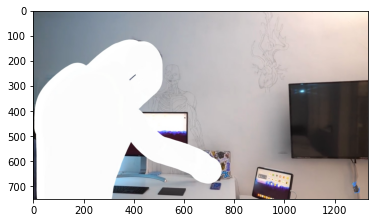

In [3]:
img=cv2.cvtColor(blur_gaussian,cv2.COLOR_BGR2RGB)
plt.imshow(original_image)

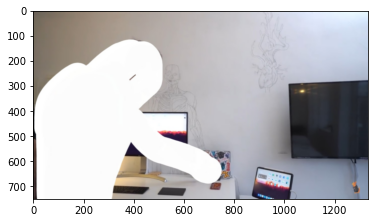

In [4]:
plt.imshow(img)

In [5]:
import sklearn.cluster as cluster
import pandas as pd
from tqdm.notebook import tqdm 

In [6]:
print(f'original shape: {img.shape}')
vectorized = img.reshape((-1,3))
print(f'vectorized shape: {vectorized.shape}')
vectorized = np.float32(vectorized)

original shape: (750, 1334, 3)
vectorized shape: (1000500, 3)


  0%|          | 0/7 [00:00<?, ?it/s]

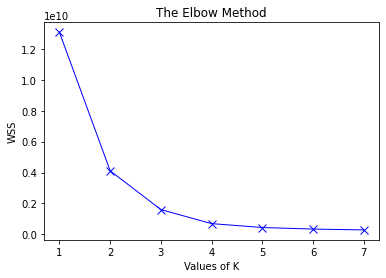

[13084218368.0, 4114164480.0, 1598264192.0, 690840448.0, 438652480.0, 338299936.0, 283245824.0]


In [12]:
def find_optimum_k(k_range,data):
    wss = []
    for k in tqdm(k_range):
        kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
        kmeans=kmeans.fit(data)
        wss_iter = kmeans.inertia_
        wss.append(wss_iter)
    mycenters = pd.DataFrame({'Clusters' : k_range, 'WSS' : wss})
    plt.plot(k_range, wss, 'bx-',linewidth=1, markersize = 8)
    plt.xlabel('Values of K')
    plt.ylabel('WSS')
    plt.title('The Elbow Method')
    plt.show()
    return wss,mycenters
wss , mycenters= find_optimum_k(range(1,8),vectorized)
print(ws)

In [18]:
# K = 4
# attempts=100
# ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
# center = np.uint8(center)
# res = center[label.flatten()]
# result_image = res.reshape((img.shape))
# segmented_image = result_image.copy()
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

def kmeans(data, K, criteria, attempts):
    ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    segmented_image = result_image.copy()
    return segmented_image,center,label
segmented_image,center,label = kmeans(vectorized, 3,(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0), 10)
cv2.imshow('segmented_image', segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
segmented_image.shape

(750, 1334, 3)

In [20]:
# cv2.imshow("Original", original_image)
# cv2.imshow("2D filtered", filt_2D)
# cv2.imshow("Blur", blur)
# cv2.imshow("Gaussian Blur", blur_gaussian)
# cv2.imshow("Median Blur", median_blur)
# cv2.imshow("Bilateral", bilateral_blur)
# cv2.waitKey(0)            
# cv2.destroyAllWindows() 

In [26]:
#converting to cleared segmentation to visuallize clearly
center_clear =center.copy()
colors = [[255,0,0], [0,255,0], [0,0,255], [255,255,0], [0,255,255], [255,0,255], [102,0,0]]
for i in range(center_clear.shape[0]):
    center_clear[i] = colors[i]
print(center_clear.shape)

(3, 3)


In [22]:
res1 = center_clear[label.flatten()]
clear_segmented = res1.reshape((img.shape))

In [23]:
result_image.shape

NameError: name 'result_image' is not defined

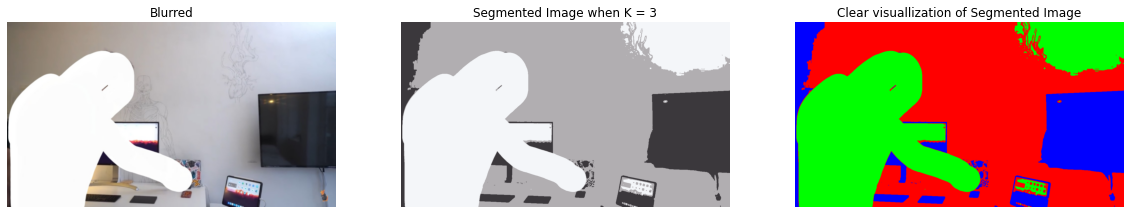

FileNotFoundError: [Errno 2] No such file or directory: 'test_kmeans/images/new10.jpg_with_blur.jpg'

In [25]:
figure_size = 15
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
# Plotting the original image.
ax[0].imshow(img)
ax[0].set_title('Blurred')
ax[0].axis('off')

# Plotting the segmented image.
ax[1].imshow(segmented_image)
ax[1].set_title(f'Segmented Image when K = 3')
ax[1].axis('off')

# Plotting the clearly segmented image.
ax[2].imshow(clear_segmented)
ax[2].set_title(f'Clear visuallization of Segmented Image')
ax[2].axis('off')


plt.subplots_adjust()
plt.show()
fig.savefig(f'test_kmeans/{image_name}_with_blur.jpg')

In [163]:
print(len(segmented_image[0]))
len(img[0])

1280


1280

In [211]:
import numpy as np
import cv2
unique_pixels = set(tuple(pixels) for rows in img for pixels in rows)
from scipy.spatial import KDTree
from webcolors import (
    CSS3_HEX_TO_NAMES,
    hex_to_rgb,
)
def convert_rgb_to_names(rgb_tuple):
    try:
        # a dictionary of all the hex and their respective names in css3
        css3_db = CSS3_HEX_TO_NAMES
        names = []
        rgb_values = []
        for color_hex, color_name in css3_db.items():
            names.append(color_name)
            rgb_values.append(hex_to_rgb(color_hex))
        kdt_db = KDTree(rgb_values)
        distance, index = kdt_db.query(rgb_tuple)
        if names[index] == 'darkslategray' or names[index] == 'black' or names[index] == 'darkslategrey':
            names[index] = 'black'
        elif names[index] == 'aliceblue' or names[index] == 'antiquewhite' or names[index] == 'aqua' or names[index] == 'beige' \
                or names[index] == 'azure' or names[index] == 'lightcyan' or names[index] == 'lightslategrey' \
                or names[index] == 'cornsilk' or names[index] == 'floralwhite' or names[index] == 'ghostwhite' or names[index] == 'lightgray' \
                or names[index] == 'honeydew' or names[index] == 'ivory' or names[index] == 'lavender' \
                or names[index] == 'lavenderblush' or names[index] == 'lightslategray' or names[index] == 'navajowhite' \
                or names[index] == 'oldlace' or names[index] == 'papayawhip' or names[index] == 'seashell' or names[index] == 'silver' \
                or names[index] == 'whitesmoke' or names[index] == 'snow' or names[index] == 'white' or names[index] == 'lightgrey':
            names[index] = 'white'
        elif names[index] == 'darkgray' or names[index] == 'darkgrey' or names[index] == 'grey' \
                or names[index] == 'dimgray' or names[index] == 'gray' or names[index] == 'slategray' \
                or names[index] == 'dimgrey' or names[index] == 'gainsboro' or names[index] == 'slategrey':
            names[index] = 'gray'
        elif names[index] == 'burlywood' or names[index] == 'chocolate' or names[index] == 'linen' or names[index] == 'maroon' \
                or names[index] == 'mistyrose' or names[index] == 'moccasin' or names[index] == 'peachpuff' or names[index] == 'peru' \
                or names[index] == 'rosybrown' or names[index] == 'sandybrown' or names[index] == 'sienna' or names[index] == 'tan' \
                or names[index] == 'wheat' or names[index] == 'brown' or names[index] == 'saddlebrown':
            names[index] = 'brown'
        elif names[index] == 'darkkhaki' or names[index] == 'lightyellow' or names[index] == 'khaki' or names[index] == 'lemonchiffon' \
            or names[index] == 'lightgoldenrodyellow' or names[index] == 'palegoldenrod' or names[index] == 'yellow' or names[index] == 'gold':
            names[index] = 'yellow'
        elif names[index] == 'aquamarine' or names[index] == 'chartreuse' or names[index] == 'darkolivegreen' \
               or names[index] == 'darkorchid' or names[index] == 'darkseagreen' \
               or names[index] == 'darkgreen' or names[index] == 'lightgreen' or names[index] == 'lightseagreen' \
               or names[index] == 'forestgreen' or names[index] == 'greenyellow' or names[index] == 'lawngreen' or names[index] == 'lime' \
               or names[index] == 'limegreen' or names[index] == 'mediumaquamarine' or names[index] == 'mediumseagreen' \
               or names[index] == 'mediumspringgreen' or names[index] == 'mediumturquoise' or names[index] == 'mintcream' \
               or names[index] == 'olive' or names[index] == 'olivedrab' or names[index] == 'palegreen' \
               or names[index] == 'paleturquoise' or names[index] == 'springgreen' \
               or names[index] == 'seagreen' or names[index] == 'teal' or names[index] == 'turquoise' or names[index] == 'yellowgreen' \
               or names[index] == 'green':
            names[index] = 'green'
        elif names[index] == 'blueviolet' or names[index] == 'cadetblue' or names[index] == 'cornflowerblue' \
                or names[index] == 'cyan' or names[index] == 'darkblue' or names[index] == 'blue' \
                or names[index] == 'darkcyan' or names[index] == 'darkslateblue' or names[index] == 'darkturquoise' \
                or names[index] == 'darkviolet' or names[index] == 'deepskyblue' \
                or names[index] == 'dodgerblue' or names[index] == 'lightblue' or names[index] == 'lightskyblue' \
                or names[index] == 'lightsteelblue' or names[index] == 'mediumblue' or names[index] == 'mediumslateblue' \
                or names[index] == 'midnightblue' or names[index] == 'navy' or names[index] == 'powderblue' or names[index] == 'royalblue' \
                or names[index] == 'skyblue' or names[index] == 'slateblue' or names[index] == 'steelblue':
            names[index] = 'blue'
        elif names[index] == 'darkmagenta' or names[index] == 'indigo' or names[index] == 'magenta' or names[index] == 'mediumorchid' \
                or names[index] == 'mediumpurple' or names[index] == 'mediumvioletred' or names[index] == 'orchid' \
                or names[index] == 'palevioletred' or names[index] == 'plum' or names[index] == 'purple' \
                or names[index] == 'thistle' or names[index] == 'violet':
            names[index] = 'purple'
        elif names[index] == 'coral' or names[index] == 'crimson' or names[index] == 'firebrick' or names[index] == 'indianred' \
                or names[index] == 'lightcoral' or names[index] == 'darkred' or names[index] == 'orangered' or names[index] == 'red' \
                or names[index] == 'tomato':
            names[index] = 'red'
        elif names[index] == 'darksalmon' or names[index] == 'lightpink' or names[index] == 'deeppink' \
                or names[index] == 'fuchsia' or names[index] == 'hotpink' or names[index] == 'pink':
            names[index] = 'pink'
        elif names[index] == 'bisque' or names[index] == 'blanchedalmond' or names[index] == 'darkgoldenrod' \
                or names[index] == 'gold' or names[index] == 'goldenrod' \
                or names[index] == 'darkorange' or names[index] == 'lightsalmon' or names[index] == 'orange' or names[index] == 'salmon':
            names[index] = 'orange'
        return names[index]
    except:
        return 'None'
unique_colors = set()
for ele in list(unique_pixels):
    unique_colors.add(convert_rgb_to_names(ele))
len(unique_colors)

11

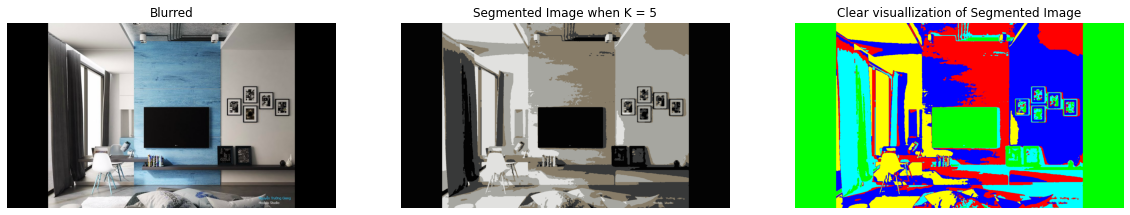

In [165]:
figure_size = 15
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
# Plotting the original image.
ax[0].imshow(original_image)
ax[0].set_title('Blurred')
ax[0].axis('off')

# Plotting the segmented image.
ax[1].imshow(segmented_image)
ax[1].set_title(f'Segmented Image when K = {K}')
ax[1].axis('off')

# Plotting the clearly segmented image.
ax[2].imshow(clear_segmented)
ax[2].set_title(f'Clear visuallization of Segmented Image')
ax[2].axis('off')


plt.subplots_adjust()
plt.show()
fig.savefig(f'test_kmeans/{image_name}_with_blur.jpg')

In [166]:
segmented_image[0]

array([[3, 3, 3],
       [3, 3, 3],
       [3, 3, 3],
       ...,
       [3, 3, 3],
       [3, 3, 3],
       [3, 3, 3]], dtype=uint8)

In [167]:
#label.tolist().count([0])

In [13]:
#getting most dominating segmented pixel
max_count = 0
for i in range(K):
    if label.tolist().count([i]) > max_count:
        max_count = label.tolist().count([i])
        background_label = i
print(background_label)

0


In [14]:
largest_center = center[background_label]
largest_center

array([189, 189, 195], dtype=uint8)

In [15]:
type(largest_center)

numpy.ndarray

In [16]:
type(result_image)

numpy.ndarray

In [21]:
last = np.where(result_image == largest_center, [0,255,0], [255,255,255])

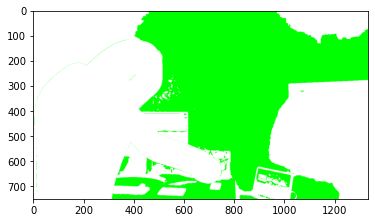

In [22]:
plt.imshow(last)

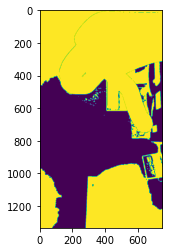

In [29]:
plt.imshow(last[:,:,0].T)

In [170]:
#turning the largest segmented image into black pixel 
count = 0
for i in range(result_image.shape[0]):
    for j in range(result_image[i].shape[0]):
        if (largest_center == result_image[i][j]).all() == True:
            for k in range(3):
                result_image[i][j] = result_image[i][j][k]/largest_center[k]

In [171]:
result_image[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [172]:
result_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [173]:
black = [0,0,0]

In [174]:
result_image[0][0]

array([0, 0, 0], dtype=uint8)

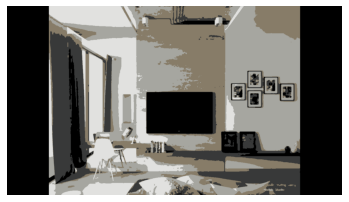

In [175]:
fig1 = plt.figure()
plt.imshow(result_image, cmap='gray')
plt.axis('off')
plt.show()
fig1.savefig('blackpixeled.png')

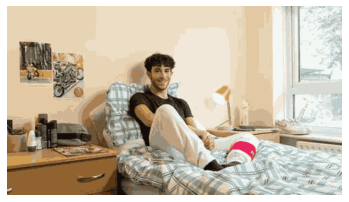

In [88]:
fig2 = plt.figure()
plt.imshow(segmented_image,cmap='gray')
plt.axis('off')
plt.show()
fig2.savefig('segmented.png')

In [ ]:
from PIL import Image, ImageDraw

IMAGE = 'segmented.png'
IMAGE_MAP = 'blackpixeled.png'
IMAGE_OUTPUT = 'Result.png'
BLACK = (0, 0, 0)
OFFSET = 10

image_map = Image.open(IMAGE_MAP)
image = Image.open(IMAGE)
pixels = image_map.load()
print(pixels[0,1])
size_sm = image_map.size
print(size_sm)
size = image.size
print(size)
ratio = (size_sm[0]/size[0], size_sm[1]/size[1])
x_list = []
y_list = []

for x in range(size_sm[0]):
    for y in range(size_sm[1]):
        if pixels[x, y] == BLACK:
            x_list.append(x)
            y_list.append(y)

draw = ImageDraw.Draw(image)
draw.rectangle(((min(x_list)/ratio[0]-OFFSET, min(y_list)/ratio[1]-OFFSET),
                (max(x_list)/ratio[0]+OFFSET,max(y_list)/ratio[1]+OFFSET)),
               width=5, outline=GREEN)
image.save(IMAGE_OUTPUT, 'PNG')

In [138]:
!pip install webcolors

8

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(x)
    labels = kmeans.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

In [641]:
# figure_size = 15
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
# # Plotting the segmented image.
# ax[0].imshow(segmented_image, cmap = 'gray')
# ax[0].set_title('Original')
# ax[0].axis('off')

# # Plotting the original image.
# ax[1].imshow(result_image, cmap='gray')
# ax[1].set_title('Black pixeled background image' )
# ax[1].axis('off')
# plt.subplots_adjust()
# plt.show()

In [375]:
result_image[0][1][2]

185

In [376]:
print(result_image[0])

[[ 40 152 185]
 [ 40 152 185]
 [ 40 152 185]
 ...
 [ 40 152 185]
 [ 40 152 185]
 [ 40 152 185]]


In [377]:
label.size

249696

In [378]:
label[436049]

IndexError: index 436049 is out of bounds for axis 0 with size 249696

In [141]:
result_image[436049]

IndexError: index 436049 is out of bounds for axis 0 with size 510

In [308]:
result_image.size

1308150

In [309]:
result_image.shape

(510, 855, 3)

In [310]:
req

array([243, 236, 221], dtype=uint8)

In [311]:
a = result_image[0]

In [312]:
a.shape

(855, 3)

In [313]:
a[0]

array([0, 0, 0], dtype=uint8)

In [314]:
for j in range(a.shape[0]):
    if (req == a[j]).all()==True:
        print('xiryo')
        for i in range(3):
            print(1)
            a[j] = a[j][i]/req[i]

In [281]:
a[0][0]/req[0]

1.0